In [1]:
import osmnx, matplotlib.pyplot as plt
%matplotlib inline
osmnx.config(file_log=True, print_log=True, use_cache=True)

In [2]:
dist = 805 # 1 mile in meters
places = [['sf', (37.793897, -122.402189), 'drive_service'],
          ['portland', (45.517309, -122.682138), 'drive_service'],
          ['irvine', (33.694981, -117.841375), 'drive_service'],
          ['rome', (41.901336, 12.471831), 'all']]

sf (37.793897, -122.402189)


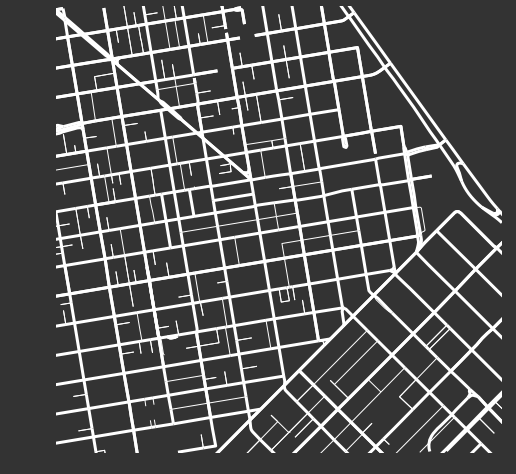

portland (45.517309, -122.682138)


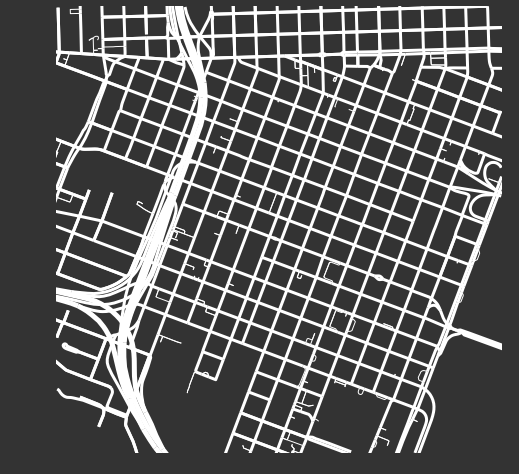

irvine (33.694981, -117.841375)


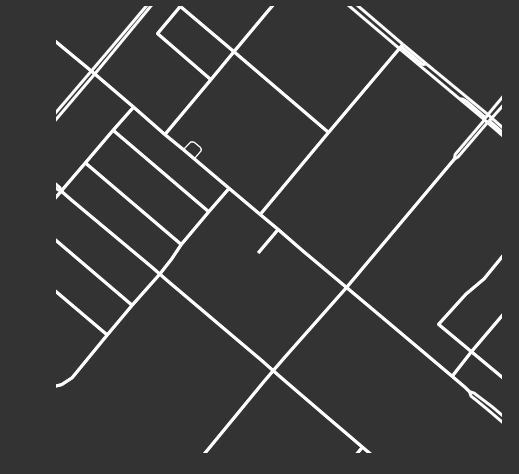

rome (41.901336, 12.471831)


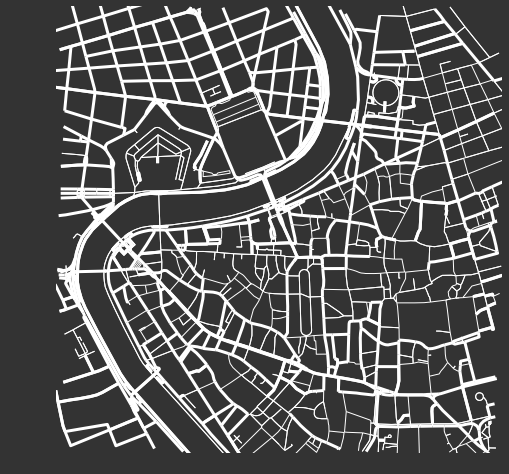

In [3]:
edges = []
for name, point, nt in places:
    print(name, point)
    G = osmnx.graph_from_point(point, distance=dist, distance_type='bbox', network_type=nt, truncate_by_edge=True)
    G = osmnx.project_graph(G)
    
    # create the bounding box in UTM zone units to limit the plot to the bounding box requested
    # this is only necessary when truncate_by_edge=True to prevent display of nodes/edges that extend beyond bounding box
    bbox_proj = osmnx.bbox_from_point(point, dist, project_utm=True, utm_crs=G.graph['crs'])
    
    ew = []
    for u, v, key, data in G.edges(keys=True, data=True):
        if data['highway'] in ['footway', 'steps', 'pedestrian', 'service', 'footway', 'path', 'track']:
            width = 1
        elif data['highway'] in ['motorway']:
            width = 5
        else:
            width = 3
        ew.append(width)
        
    fig, ax = osmnx.plot_graph(G, bbox=bbox_proj, fig_height=8, margin=0, node_size=0, edge_linewidth=ew,
                               edge_color='w', bgcolor='#333333', show=True, save=True, filename='gs_'+name)
    
    edges.extend(G.edges(keys=True, data=True))

In [4]:
hwys = [data['highway'] for u, v, key, data in edges]
tags = list(set([hwy[0] if isinstance(hwy, list) else hwy for hwy in hwys]))
tags

['unclassified',
 'primary',
 'service',
 'primary_link',
 'secondary_link',
 'residential',
 'motorway',
 'tertiary_link',
 'steps',
 'secondary',
 'pedestrian',
 'trunk',
 'footway',
 'motorway_link',
 'living_street',
 'cycleway',
 'tertiary']